# Linear Regression

## What is Linear Regression?
A statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables.

- One variable, denoted $x$, is regarded as the **predictor**, **explanatory**, or **independent variable**.
- The other variable, $y$ denoted , is regarded as the **response**, **outcome**, or **dependent variable**.

**Salary = $Y$** depends on the **year of experience = $X$**

In short, algorithms that learn how output($y$) depends on input($x$)
$$y = f(x)$$
The simplest form of $f$;
$y = mx + c$


## Linear Regression Equation
The simplest form of a simple linear regression equation with one dependent and one independent variable is represented by:
$$y = mx +c$$

Where,
- $y$ = dependent variable
- $x$ = independent variable
- $m$ = slope of the line
- $c$ = coefficient of the line

$$ m = \frac{y_2 - y_1}{x_2 - x_1}$$

## Calculating slope(m) of the line

$$
m = r \frac{S_y}{S_x}
$$

Where,
- m = slope of the line
- r = pearson's r correlation
- $S_y$ = standard deviation of y
- $S_x$ = standard deviation of the x

Calculating y-intercept coefficient(c) of the line
$$
c = \overline y - m \overline x
$$

Where,
- c = intercept(c) or coefficient of the line
- m = slope of the line
- $\overline y$ mean of y
- $\overline x$ mean of x

## Multiple Linear Regression
$$
y = m_1x_1 + m_2y_2 + m_3y_3 + \cdots + m_nx_n + c
$$

- $x_1, x_2, x_3$ = independent variables
- $y$ = dependent variable
- $m_1, m_2, m_3$ = slopes
- $c$ = coefficient

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x_and_y = [(0, 1), (1, 3), (2, 2), (3, 5), (4, 7), (5, 8), (6, 8), (7, 9), (8, 10), (9,12)]
x_and_y

[(0, 1),
 (1, 3),
 (2, 2),
 (3, 5),
 (4, 7),
 (5, 8),
 (6, 8),
 (7, 9),
 (8, 10),
 (9, 12)]

In [3]:
data = pd.DataFrame(x_and_y, columns=['X', 'Y_true'])
data

,X,Y_true
0,0,1
1,1,3
2,2,2
3,3,5
4,4,7
5,5,8
6,6,8
7,7,9
8,8,10
9,9,12


## Calculating Slope(m) of the Line

$$
m = r \frac{S_y}{S_x}
$$

Where,
- m = slope of the line
- r = pearson's r correlation
- $S_y$ = standard deviation of y
- $S_x$ = standard deviation of the x

In [4]:
# calculate pearson's correlation
data['X'].corr(data['Y_true'])

0.9759805523748861

In [5]:
# calculate standard deviation of `x`
data['X'].std()

3.0276503540974917

In [6]:
# calculate standard deviation of `y`
data['Y_true'].std()

3.6285901761795403

In [7]:
m = 0.975* (3.62/3.02)
m

1.1687086092715233

## Calculating y-intercept coefficient(c) of the line
$$
c = \overline y - m \overline x
$$

Where,
- c = intercept(c) or coefficient of the line
- m = slope of the line
- $\overline y$ mean of y
- $\overline x$ mean of x

In [8]:
# calculate the mean of `y`
data['Y_true'].mean()

6.5

In [9]:
# calculate the mean of `x'
data['X'].mean()

4.5

In [10]:
c = 6.5 - m * 4.5
c

1.2408112582781454

In [11]:
data

,X,Y_true
0,0,1
1,1,3
2,2,2
3,3,5
4,4,7
5,5,8
6,6,8
7,7,9
8,8,10
9,9,12


In [12]:
# y = mx+c
y_pred = m * 1 + c
y_pred

2.409519867549669

In [13]:
# y = mx+c
y_pred = m * 3 + c
y_pred

4.746937086092715

In [14]:
# create a new colum 'Y_pred'
data['Y_pred'] = m * data['X'] + c
data

,X,Y_true,Y_pred
0,0,1,1.240811
1,1,3,2.409520
2,2,2,3.578228
3,3,5,4.746937
4,4,7,5.915646
5,5,8,7.084354
6,6,8,8.253063
7,7,9,9.421772
8,8,10,10.590480
9,9,12,11.759189


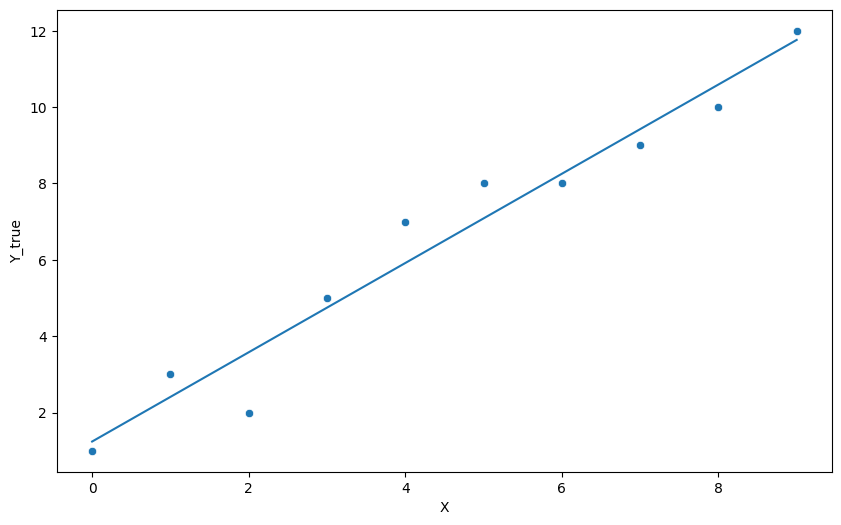

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='Y_true', data=data)
sns.lineplot(x='X', y='Y_pred', data=data)
plt.show()

# Metrics for Evaluating Regression Models

In [17]:
data

,X,Y_true,Y_pred
0,0,1,1.240811
1,1,3,2.409520
2,2,2,3.578228
3,3,5,4.746937
4,4,7,5.915646
5,5,8,7.084354
6,6,8,8.253063
7,7,9,9.421772
8,8,10,10.590480
9,9,12,11.759189


In [18]:
data['errors'] = data['Y_true'] - data['Y_pred']
data

,X,Y_true,Y_pred,errors
0,0,1,1.240811,-0.240811
1,1,3,2.409520,0.590480
2,2,2,3.578228,-1.578228
3,3,5,4.746937,0.253063
4,4,7,5.915646,1.084354
5,5,8,7.084354,0.915646
6,6,8,8.253063,-0.253063
7,7,9,9.421772,-0.421772
8,8,10,10.590480,-0.590480
9,9,12,11.759189,0.240811


## $R^2$ Score
In statistics, the coefficient of determination, denoted $R^2$ or $r^2$ and pronounced "R squared", is the proportion of the variation in the dependent variable that is predictable from the independent variable.
$$
R^2 = \frac{1 - SSR}{SST}
$$

Where,
- $R^2$ = coefficient of determination
- SSR = sum of square of residuals(errors)
- SST = total sum of squares

$$
SST = \frac{\overline y_t}{\sigma}
$$

- $y_t$ = actual value
- $\sigma$ = standard deviations

### Key Points
- The most common and popular metric for evaluating regression
- Between 0 and 100%
- Unfortunately, always increases by adding new x variables
- Can lead to overfitting
- Adjusted R2 preferred for evaluating multiple regression


## Adjusted-$R^2$

- Adjusted-$R^2$ = $R^2$ x (Penalty for adding irrelevant variables)
- Increases if irrelevant* variables are deleted
- (*irrelevant variables = any group whose F-ratio < 1)


#### Interpretation
- $r^2$ > 0.9; Good model
- $r^2$ = 1.0; Perfect model, it means zero error(SSR = 0)
- $r^2$ > 0.5; Bad model; mean model(SSR = SST)
- $r^2$ < 0; SSR > SST  

## $R^2$ Score

In [19]:
# calculate r2 score using scikit-learn
from sklearn.metrics import r2_score
r2_score(data['Y_true'], data['Y_pred'])

0.9525373585241376

## Absolute Error
$$\lvert y_t - y_p \rvert$$

Where,
- $y_t$ = true value of y
- $y_p$ = predicted value of y

In [21]:
# calculate absulte errors
np.abs(data['errors'])

,errors
0,0.240811
1,0.590480
2,1.578228
3,0.253063
4,1.084354
5,0.915646
6,0.253063
7,0.421772
8,0.590480
9,0.240811


### Mean Absolute Error(MAE)
**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_t- {y}_p|$$

In [22]:
# calculate MAE by hand
np.abs(data['errors']).mean()

0.6168708609271525

In [23]:
# calculate MAE using scikit-learn
from sklearn.metrics import mean_absolute_error
mean_absolute_error(data['Y_true'], data['Y_pred'])

0.6168708609271525

## Mean Squared Error
**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_t-{y}_p)^2$$

In [24]:
data

,X,Y_true,Y_pred,errors
0,0,1,1.240811,-0.240811
1,1,3,2.409520,0.590480
2,2,2,3.578228,-1.578228
3,3,5,4.746937,0.253063
4,4,7,5.915646,1.084354
5,5,8,7.084354,0.915646
6,6,8,8.253063,-0.253063
7,7,9,9.421772,-0.421772
8,8,10,10.590480,-0.590480
9,9,12,11.759189,0.240811


In [25]:
data['abserrors'] = np.abs(data['errors'])
data

,X,Y_true,Y_pred,errors,abserrors
0,0,1,1.240811,-0.240811,0.240811
1,1,3,2.409520,0.590480,0.590480
2,2,2,3.578228,-1.578228,1.578228
3,3,5,4.746937,0.253063,0.253063
4,4,7,5.915646,1.084354,1.084354
5,5,8,7.084354,0.915646,0.915646
6,6,8,8.253063,-0.253063,0.253063
7,7,9,9.421772,-0.421772,0.421772
8,8,10,10.590480,-0.590480,0.590480
9,9,12,11.759189,0.240811,0.240811


In [27]:
data['squared_errors'] = data['abserrors'] ** 2
data

,X,Y_true,Y_pred,errors,abserrors,squared_errors
0,0,1,1.240811,-0.240811,0.240811,0.057990
1,1,3,2.409520,0.590480,0.590480,0.348667
2,2,2,3.578228,-1.578228,1.578228,2.490805
3,3,5,4.746937,0.253063,0.253063,0.064041
4,4,7,5.915646,1.084354,1.084354,1.175824
5,5,8,7.084354,0.915646,0.915646,0.838407
6,6,8,8.253063,-0.253063,0.253063,0.064041
7,7,9,9.421772,-0.421772,0.421772,0.177891
8,8,10,10.590480,-0.590480,0.590480,0.348667
9,9,12,11.759189,0.240811,0.240811,0.057990


In [29]:
data['squared_errors'].mean()

0.5624323014889697

In [30]:
# calculate MSE using scikit-learn
from sklearn.metrics import mean_squared_error
mean_squared_error(data['Y_true'], data['Y_pred'])

0.5624323014889697

### Root Mean Squared Error
**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_t-{y}_p)^2}$$

In [31]:
np.sqrt(data['squared_errors'].mean())

0.7499548663012793

In [32]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(data['Y_true'], data['Y_pred']))

0.7499548663012793

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

# Calories Burn Prediction using Machine Learning

In [33]:
!pip install git+https://github.com/pycaret/pycaret.git@master --upgrade

  Cloning https://github.com/pycaret/pycaret.git (to revision master) to /tmp/pip-req-build-gcc8b750
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-gcc8b750
  Resolved https://github.com/pycaret/pycaret.git to commit 97649adf8965fd02831c14982a48323b6ce7de4c
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.6 MB/s eta 0:00:00
   ━━━━

In [1]:
# Load libraries
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('/content/calories.csv')
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [3]:
# setup the experiment
from pycaret.regression import *
exp_reg = setup(data, target='Calories', session_id=123)

,Description,Value
0,Session id,123
1,Target,Calories
2,Target type,Regression
3,Original data shape,"(15000, 9)"
4,Transformed data shape,"(15000, 9)"
5,Transformed train set shape,"(10500, 9)"
6,Transformed test set shape,"(4500, 9)"
7,Numeric features,7
8,Categorical features,1
9,Preprocess,True


In [4]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [5]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dummy,Dummy Regressor,53.3497,3920.5844,62.6076,-0.0026,1.0188,2.0694,0.0670
br,Bayesian Ridge,53.3525,3920.7784,62.6092,-0.0027,1.0188,2.0692,0.0800
omp,Orthogonal Matching Pursuit,53.3525,3920.7789,62.6092,-0.0027,1.0188,2.0692,0.0570
llar,Lasso Least Angle Regression,53.3671,3922.0025,62.6189,-0.0030,1.0187,2.0680,0.0570
lasso,Lasso Regression,53.3671,3922.0023,62.6189,-0.0030,1.0187,2.0680,0.0600
en,Elastic Net,53.3687,3922.3744,62.6219,-0.0031,1.0187,2.0678,0.0610
lr,Linear Regression,53.3882,3924.6272,62.6398,-0.0036,1.0188,2.0676,0.5350
ridge,Ridge Regression,53.3882,3924.6242,62.6398,-0.0036,1.0188,2.0676,0.0580
lar,Least Angle Regression,53.4235,3930.5015,62.6871,-0.0052,1.0190,2.0673,0.0640
gbr,Gradient Boosting Regressor,53.6077,3965.9685,62.9686,-0.0142,1.0206,2.0687,1.0620


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [6]:
# create models
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,53.4224,3938.5009,62.7575,-0.0015,1.0531,2.2352
1,51.9591,3685.7203,60.7101,-0.0149,1.0695,2.4432
2,54.3486,4041.2624,63.5709,-0.0014,1.0179,2.0515
3,53.5891,3914.8731,62.5689,0.0002,1.0042,1.9729
4,52.4569,3819.5245,61.8023,-0.0017,0.9753,1.8121
5,53.7240,3983.8848,63.1180,-0.0015,1.0390,2.1609
6,53.5377,3983.7293,63.1168,-0.0045,0.9850,1.8696
7,52.5950,3824.4895,61.8425,-0.0026,1.0135,2.0672
8,54.5702,4119.1697,64.1808,-0.0076,1.0059,2.0317


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [7]:
# print model parameters
print(lr)

LinearRegression(n_jobs=-1)


In [8]:
# tune model
tuned_lr = tune_model(lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,53.4295,3939.4476,62.7650,-0.0017,1.0531,2.2352
1,51.9487,3682.5416,60.6839,-0.0140,1.0693,2.4444
2,54.3441,4043.4569,63.5882,-0.0019,1.0181,2.0514
3,53.5990,3916.0628,62.5785,-0.0001,1.0043,1.9741
4,52.4589,3819.7936,61.8045,-0.0018,0.9753,1.8120
5,53.7206,3983.8773,63.1180,-0.0015,1.0389,2.1605
6,53.5400,3985.5576,63.1313,-0.0049,0.9852,1.8700
7,52.5967,3823.7818,61.8367,-0.0024,1.0133,2.0649
8,54.5318,4115.8337,64.1548,-0.0067,1.0056,2.0316


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [9]:
# print tuned parameters
print(tuned_lr)

LinearRegression(n_jobs=-1)


In [11]:
# to access the tuner object you can set return_tuner = True
tuned_lr, tuner = tune_model(lr, return_tuner=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,53.4295,3939.4476,62.7650,-0.0017,1.0531,2.2352
1,51.9487,3682.5416,60.6839,-0.0140,1.0693,2.4444
2,54.3441,4043.4569,63.5882,-0.0019,1.0181,2.0514
3,53.5990,3916.0628,62.5785,-0.0001,1.0043,1.9741
4,52.4589,3819.7936,61.8045,-0.0018,0.9753,1.8120
5,53.7206,3983.8773,63.1180,-0.0015,1.0389,2.1605
6,53.5400,3985.5576,63.1313,-0.0049,0.9852,1.8700
7,52.5967,3823.7818,61.8367,-0.0024,1.0133,2.0649
8,54.5318,4115.8337,64.1548,-0.0067,1.0056,2.0316


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [12]:
tuner

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(memory=Memory(location=None),
                                steps=[('numerical_imputer',
                                        TransformerWrapper(include=['User_ID',
                                                                    'Age',
                                                                    'Height',
                                                                    'Weight',
                                                                    'Duration',
                                                                    'Heart_Rate',
                                                                    'Body_Temp'],
                                                           transformer=SimpleImputer())),
                                       ('categorical_imputer',
                                        TransformerWrapper(include=['Gender'],
                                                           transformer=Simpl...
                                        TransformerWrapper(include=['Gender'],
                                                           transformer=OrdinalEncoder(cols=['Gender'],
                                                                                      handle_missing='return_nan',
                                                                                      mapping=[{'col': 'Gender',
                                                                                                'data_type': dtype('O'),
                                                                                                'mapping': female    0
male      1
NaN      -1
dtype: int64}]))),
                                       ('actual_estimator',
                                        LinearRegression(n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'actual_estimator__fit_intercept': [True, False]},
             refit=False, scoring='r2', verbose=1)

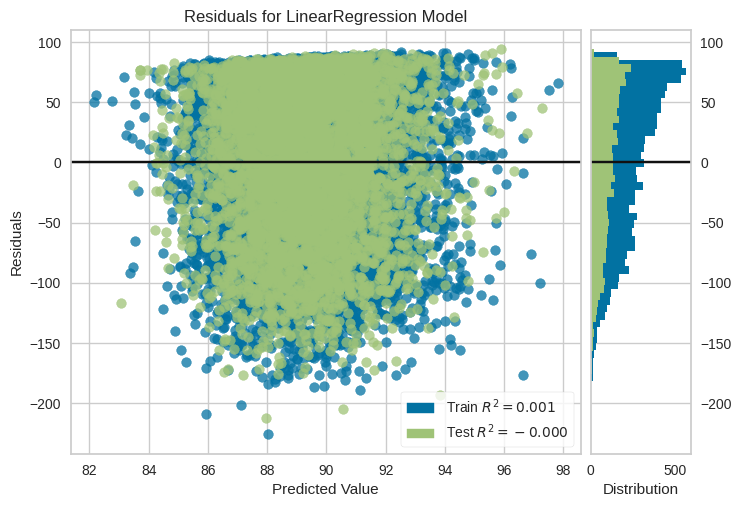

In [13]:
# residuals plot
plot_model(lr, plot = 'residuals')

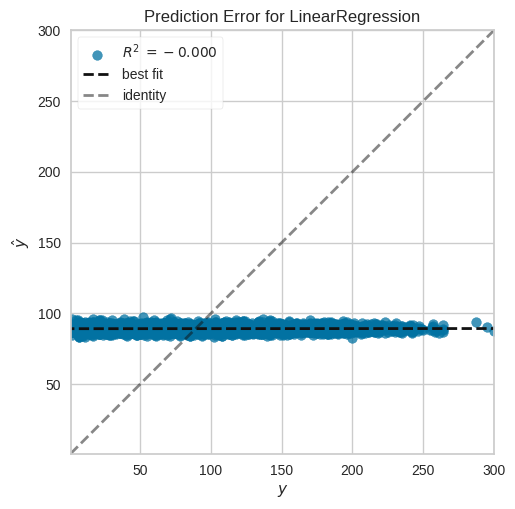

In [14]:
# predicting error plot
plot_model(lr, plot = 'error')

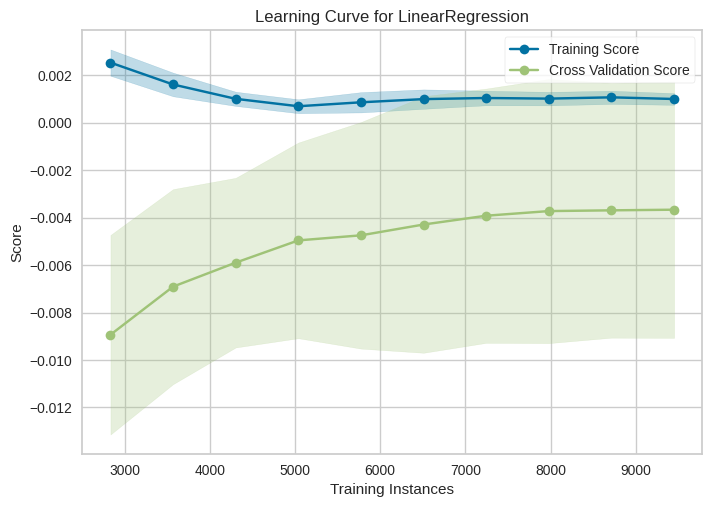

In [15]:
# learning curve
plot_model(lr, plot = "learning")

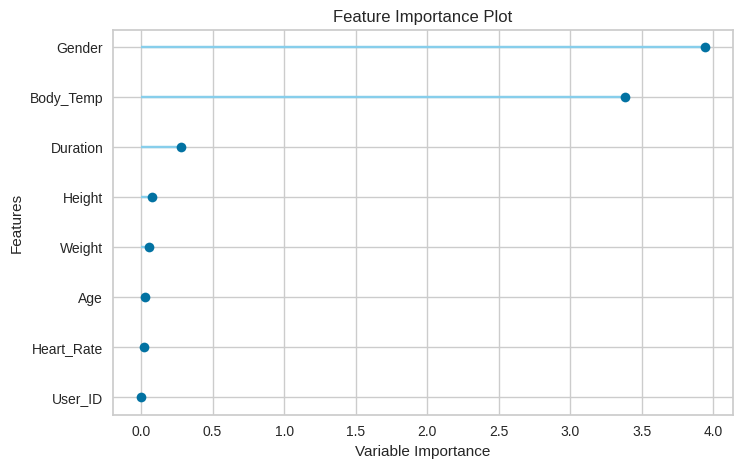

In [16]:
# plot feature importance
plot_model(lr, plot = 'feature')

In [17]:
# evaluate models
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [19]:
# prediction on test set
preds = predict_model(lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,52.5519,3859.2124,62.1226,-0.0003,1.0151,2.1098


In [20]:
preds.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,prediction_label
6958,15399629,female,71,166.0,58.0,20.0,99.0,40.900002,123.0,85.009748
7534,17761176,male,22,191.0,92.0,2.0,84.0,38.099998,5.0,89.828841
2975,14032506,female,50,152.0,48.0,13.0,87.0,39.900002,60.0,91.345458
3903,15190143,female,76,170.0,73.0,3.0,74.0,38.099998,10.0,91.325440
8437,18418052,female,67,160.0,61.0,5.0,79.0,38.900002,20.0,89.559724


In [21]:
# save models
save_model(lr, 'calpred_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['User_ID', 'Age', 'Height',
                                              'Weight', 'Duration', 'Heart_Rate',
                                              'Body_Temp'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Gender'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['Gender'],
                                     transformer=OrdinalEncoder(cols=['Gender'],
                                                                handle_missing='return_nan',
                                                                mapping=[{'col': 'Gender',
                                                                          'data_type': 

In [23]:
model = load_model('/content/calpred_model.pkl')

FileNotFoundError: [Errno 2] No such file or directory: '/content/calpred_model.pkl.pkl'